In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from pmdarima.arima.utils import ndiffs, nsdiffs
from sklearn.metrics import mean_squared_error
import pickle

In [2]:
df = pd.read_csv('processed.csv', index_col='DATE', parse_dates=True)
df.head()

,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
DATE,,,
2000-01-01,78.0,835.0,3448.0
2000-02-01,53.0,890.0,3181.0
2000-03-01,73.0,974.0,3783.0
2000-04-01,78.0,834.0,3317.0
2000-05-01,96.0,1086.0,4123.0


In [3]:
Alkohol_df = df[['Alkoholunfälle']]
Flucht_df = df[['Fluchtunfälle']]
Verkehrs_df = df[['Verkehrsunfälle']]
dataframes = {'Alkoholunfälle': Alkohol_df, 'Fluchtunfälle': Flucht_df, 'Verkehrsunfälle': Verkehrs_df}

In [4]:
dataframes

{'Alkoholunfälle':             Alkoholunfälle
 DATE                      
 2000-01-01            78.0
 2000-02-01            53.0
 2000-03-01            73.0
 2000-04-01            78.0
 2000-05-01            96.0
 ...                    ...
 2020-08-01            46.0
 2020-09-01            46.0
 2020-10-01            34.0
 2020-11-01            23.0
 2020-12-01            13.0
 
 [252 rows x 1 columns],
 'Fluchtunfälle':             Fluchtunfälle
 DATE                     
 2000-01-01          835.0
 2000-02-01          890.0
 2000-03-01          974.0
 2000-04-01          834.0
 2000-05-01         1086.0
 ...                   ...
 2020-08-01          735.0
 2020-09-01          948.0
 2020-10-01          997.0
 2020-11-01          864.0
 2020-12-01          694.0
 
 [252 rows x 1 columns],
 'Verkehrsunfälle':             Verkehrsunfälle
 DATE                       
 2000-01-01           3448.0
 2000-02-01           3181.0
 2000-03-01           3783.0
 2000-04-01           3317.0
 20

In [5]:
ndiff_estimated = {category:[] for category in dataframes.keys()}
for category, dataframe in dataframes.items():
    ndiff_estimated[category].append(ndiffs(dataframe, max_d=4))
    ndiff_estimated[category].append(nsdiffs(dataframe, max_D=4, m=12))

In [6]:
ndiff_estimated.items()

dict_items([('Alkoholunfälle', [1, 0]), ('Fluchtunfälle', [1, 0]), ('Verkehrsunfälle', [1, 0])])

In [7]:
orders_estimated = {category:[] for category in dataframes.keys()}
for category, dataframe in dataframes.items():
    print('Estimating orders for: {}\n'.format(category))
    model = auto_arima(dataframe, seasonal=True, d=ndiff_estimated[category][0],
                          D=ndiff_estimated[category][1], m=12, max_p=5, max_q=5, max_P=5, max_Q=5,
                          trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
    #pickle.dump(model, open((category +'.pkl'), 'wb'))
    print('-'*50)
    orders_estimated[category].append(model.order)
    orders_estimated[category].append(model.seasonal_order)

Estimating orders for: Alkoholunfälle

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1808.063, Time=1.74 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1997.543, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1907.150, Time=0.25 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1907.767, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1995.645, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1852.066, Time=0.92 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=1809.722, Time=3.49 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=1809.708, Time=3.45 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1927.066, Time=0.49 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=1865.613, Time=1.28 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=1826.206, Time=1.42 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=1811.780, Time=3.73 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=1805.988,

C:\Users\Muhammad Salman\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Muhammad Salman\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Root Mean Squared Error for Alkoholunfälle is:  9.3855957405532


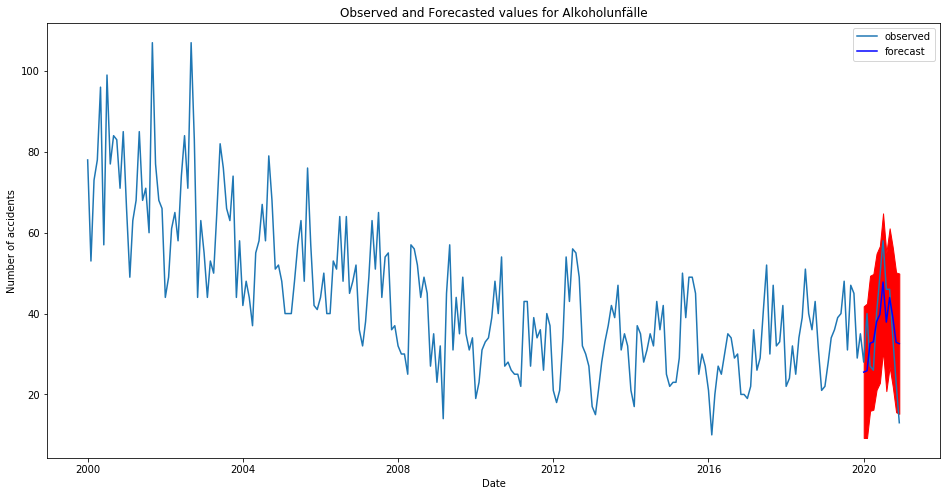

C:\Users\Muhammad Salman\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Muhammad Salman\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Muhammad Salman\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Root Mean Squared Error for Fluchtunfälle is:  180.70433403606435


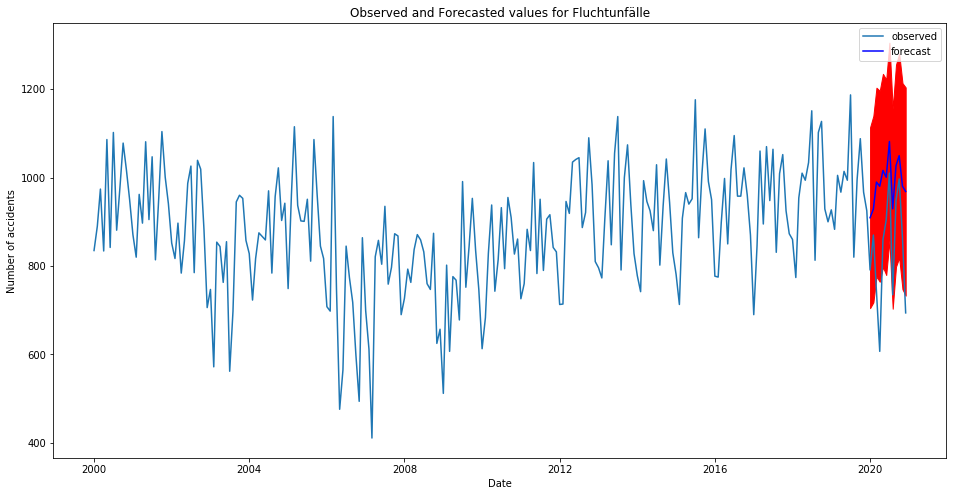

C:\Users\Muhammad Salman\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Muhammad Salman\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Muhammad Salman\.conda\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Root Mean Squared Error for Verkehrsunfälle is:  697.4483313929807


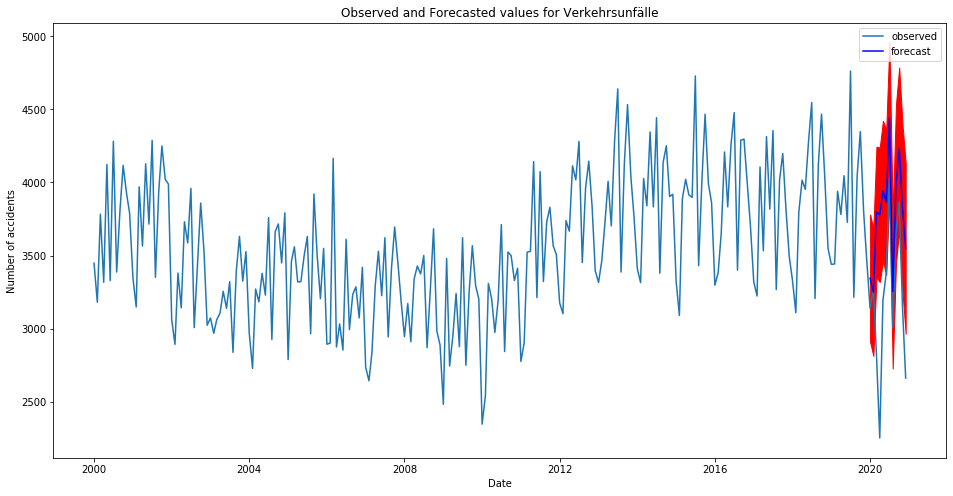

In [8]:
for category, dataframe in dataframes.items():
    model = SARIMAX(dataframe[:'2019'], order=orders_estimated[category][0],
                    seasonal_order=orders_estimated[category][1])
    results = model.fit()
    results.save(category + "_model" +'.pkl')
    forecast = results.get_forecast(steps=12)
    mean_forecast = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()
    lower_limits = confidence_intervals.iloc[:,0]
    upper_limits = confidence_intervals.iloc[:,1]
    print('Root Mean Squared Error for {} is: '.format(category),
          np.sqrt(mean_squared_error(dataframe.loc['2020':], mean_forecast)))
    #plotting the forecasted values, along with the observed values
    fig, ax = plt.subplots(figsize=(16,8))
    ax.plot(dataframe.index, dataframe[category], label='observed')
    ax.plot(mean_forecast.index, mean_forecast, color='b', label='forecast')
    ax.fill_between(mean_forecast.index, lower_limits, upper_limits, color='red')
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of accidents')
    ax.set_title('Observed and Forecasted values for {}'.format(category))
    ax.legend()
    plt.show()